In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
train_path = "C:/Users/yashv/OneDrive/Desktop/Datasets/Sign-Language-Digits-Datase/train"
valid_path = "C:/Users/yashv/OneDrive/Desktop/Datasets/Sign-Language-Digits-Datase/valid"
test_path = "C:/Users/yashv/OneDrive/Desktop/Datasets/Sign-Language-Digits-Datase/test"

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


**Modify Model**

In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [5]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [6]:
x = mobile.layers[-6].output
x = tf.keras.layers.Flatten()(x)
output = Dense(units=10, activation='softmax')(x)

In [7]:
model = Model(inputs=mobile.input, outputs=output)

In [8]:
for layer in model.layers[:-23]:
    layer.trainable=False

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping()
model.fit(x = train_batches, validation_data = valid_batches,  callbacks=[early_stopping], epochs=10, verbose=1)

Epoch 1/10
172/172 [==============================] - 64s 356ms/step - loss: 0.7366 - accuracy: 0.8178 - val_loss: 0.5488 - val_accuracy: 0.8400
Epoch 2/10
172/172 [==============================] - 62s 360ms/step - loss: 0.0660 - accuracy: 0.9836 - val_loss: 0.1808 - val_accuracy: 0.9467
Epoch 3/10
172/172 [==============================] - 60s 352ms/step - loss: 0.0164 - accuracy: 0.9936 - val_loss: 0.0941 - val_accuracy: 0.9767
Epoch 4/10
172/172 [==============================] - 60s 351ms/step - loss: 0.0045 - accuracy: 0.9982 - val_loss: 0.1646 - val_accuracy: 0.9667


In [22]:
test_labels = test_batches.classes

In [24]:
predictions = model.predict(x=test_batches, verbose=0)

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
cm = confusion_matrix(y_true = test_labels, y_pred = predictions.argmax(axis=1))

In [20]:
test_batches.class_indices

{'A0': 0,
 'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'A6': 6,
 'A7': 7,
 'A8': 8,
 'A9': 9}

confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 2 0 3 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


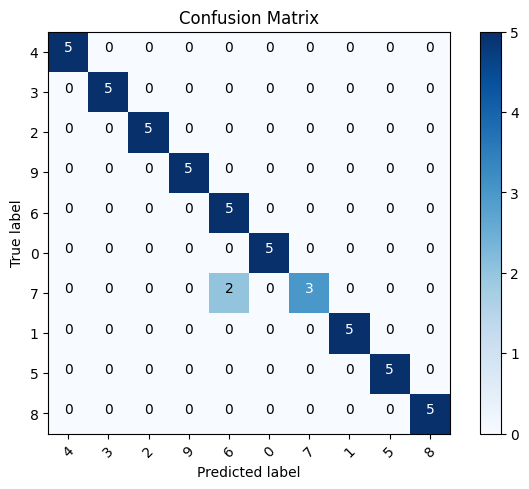

In [21]:
cm_plot_labels = {'0','1','2','3','4','5','6','7','8','9'}
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')